# MODELO LINEAL Y SUS PROPIEDADES

Nava del Río José Antonio
Ojeda Contreras Braulio Melquisedec 
Suárez Pérez Juan Pablo
Vázquez Portuguez José Antonio 

## Instrucciones

1.- Genere un modelo lineal que será el modelo subyacente de una población para poder ajustar una regresión. El modelo debe de ser de una sola variable. Grafique este modelo.
2.- Muestree N datos de la población y grafiquelos en conjunto con el modelo subjacente. No olvide añadir ruido a las muestras.
3.- Ajuste un modelo lineal para las N muestras utilizando las estimaciones de los parámetros vistas en clase. Grafique el modelo ajustado en conjunto con el modelo de la población.
4.- Compruebe que la suma de los residuales es igual a cero.
5.- Compruebe que la covarianza entre la característica y los residuales es igual a cero.
6.- Pruebe que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado. Grafíquelos.


In [1]:
# Importamos las bibliotecas necesarias...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Modelo lineal

In [2]:
# Función para generar un modelo lineal de una variable.
def generate_model():
    """
        Modelo lineal de una variable.
        Entrada: 
        Salida: [m,b] m (pendiente), b (intersección con eje y)
    """
    m = np.random.normal(0, 1)
    b = np.random.normal(0, 1)
  
    return [m, b]

In [3]:
# Función para implementar un modelo lineal.
def lineal_model(m, b, x):
    """
        Implementación del modelo
        Entrada: m (pendiente), b (intersección con eje y), x (Vector X)
        Salida: m * x + b (Vector Y)
    """
    return m * x + b

In [4]:
# Parámetros de incialización del modelo lineal.
N = 200
min_x = 0
max_x = 21

In [5]:
# Generación del modelo lineal.
m, b = generate_model()
# Implementación del modelo lineal. 
x = np.linspace(min_x, max_x, N)
lm = lineal_model(m, b, x)

### Generación de la población

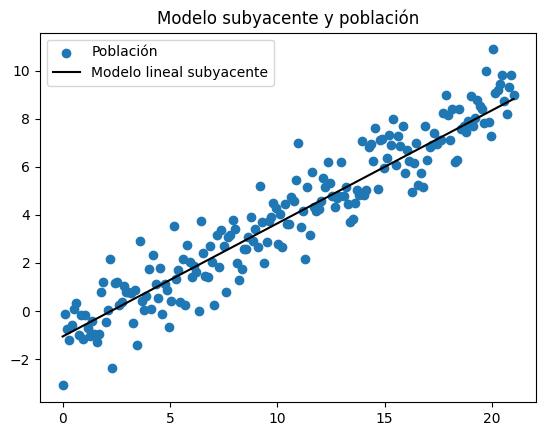

In [6]:
# Generamos puntos para graficar la población.
y = lm + np.random.normal(0, 1, N)
# Grafica el modelo.
plt.scatter(x, y, label="Población")
plt.plot(x, lm, label="Modelo lineal subyacente", color="black")
plt.legend()
plt.title("Modelo subyacente y población")
plt.show()

### Muestreo de la población

In [7]:
# Muestreo de puntos de la población total.
n_sample = 50
idx_x_sample = np.random.randint(0, N, n_sample)
x_sample = x[idx_x_sample]
y_sample = y[idx_x_sample]

NameError: name 'n_sample' is not defined

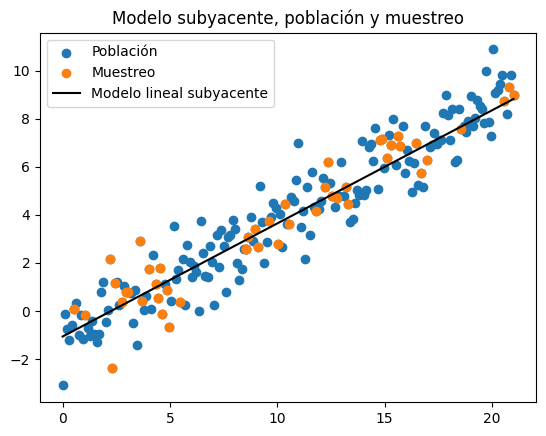

In [8]:
# Gráfica del modelo subyacente, población y muestreo.
plt.scatter(x, y, label="Población")
plt.scatter(x_sample, y_sample, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="black")
plt.legend()
plt.title("Modelo subyacente, población y muestreo")
plt.show()

### Ajustar modelo con la muestra

In [9]:
# Ajuste de estimadores del modelo lineal.
def ajust_lineal_model(X, y):
    """
        Ajuste del modelo lineal.
        Entrada: X (Muestra de X), y (muestra de Y).
        Salida: m_adj (Estimador m), b_adj (Estimador b).
    """
    m_adj = np.cov(X, y)[0, 1] / np.var(X)
    b_adj = np.mean(y) - m_adj * np.mean(X)
    return [m_adj, b_adj]


In [10]:
# Crear un array de unos.
ones_array = np.ones(len(x_sample))

# Concatenar los arrays.
A = np.vstack([x_sample, ones_array]).T

# Ajuste del modelo.
m_adj, c_adj = np.linalg.lstsq(A, y_sample, rcond=None)[0]

# Impresión del modelo lineal ajustado.
print(m_adj, c_adj)

0.4719527198326639 -0.9452700717576642


In [11]:
# Implentación de la función de ajuste del modelo lineal.
m_adj_1, b_adj_1 = ajust_lineal_model(x_sample, y_sample)

# Impresión del modelo lineal ajustado.
print(m_adj_1, b_adj_1)

0.48158440799251445 -1.037966600218697


In [12]:
# Impresión del modelo lineal poblacional. 
print(m, b)

0.47066146907368733 -1.0668603814665585


In [13]:
# Primera Implementación.
lm_adj = lineal_model(m_adj, c_adj, x)
# Segunda Implementacón.
lm_adj_1 = lineal_model(m_adj_1, b_adj_1, x)

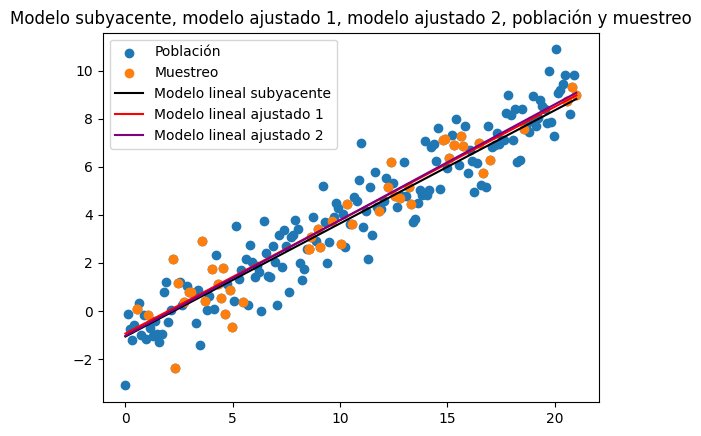

In [14]:
# Gráfica de modelo subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo
plt.scatter(x, y, label="Población")
plt.scatter(x_sample, y_sample, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="black")
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="red")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="purple")
plt.legend()
plt.title("Modelo subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo")
plt.show()

In [15]:
# Residuos implementación 1.
y_adjusted = lm_adj[idx_x_sample]
resids = y_sample - y_adjusted

# Resiudos implementación 2.
y_adjusted_1 = lm_adj_1[idx_x_sample]
resids_1 = y_sample - y_adjusted_1


In [16]:
# Verifica que la suma de los residuales es igual a cero.

# Implementación 1.
assert np.isclose(np.sum(resids), 0), 'Error: La suma de los residuales de la implementación 1 no se acerca a cero'

# Implementación 2.
assert np.isclose(np.sum(resids_1), 0), 'Error: La suma de los residuales de la implementación 2 no se acerca a cero'

AssertionError: No se acerca a cero

In [17]:
# Verifica que la covarianza entre la característica y los residuales es igual a cero

# Implementación 1.
cov = np.cov(x_sample, resids)[0, 1]
assert np.isclose(cov, 0), 'Error: La covarianza de la implementación 1 no se acerca a cero, cov' + str(cov)

# Implementación 2.
cov_1 = np.cov(x_sample, resids_1)[0, 1]
assert np.isclose(cov_1, 0, atol=5e-1), 'Error: La covarianza de la implementación 2 no se acerca a cero, cov: ' + str(cov_1)

AssertionError: Error: La covarianza de la implementación 2 no se acerca a cero, cov: -0.129057940192051

In [18]:
# Prueba que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado.
media_x_sample = np.mean(x_sample)
media_y_sample = np.mean(y_sample)

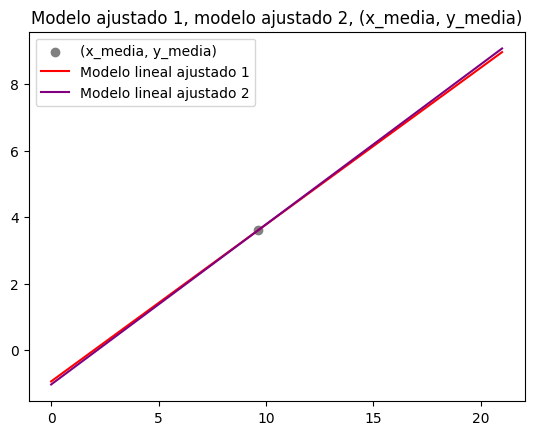

In [19]:
# Gráfica del modelo ajustado 1, modelo ajustado 2, (x_media, y_media)
plt.scatter(media_x_sample, media_y_sample, label="(x_media, y_media)", color='grey')
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="red")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="purple")
plt.legend()
plt.title("Modelo ajustado 1, modelo ajustado 2, (x_media, y_media)")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a6e66f7-3e98-482d-9a0d-41a728baee50' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>